Analisis Supplier kain terbaik di Jawa Barat dengan Fuzzy Logic

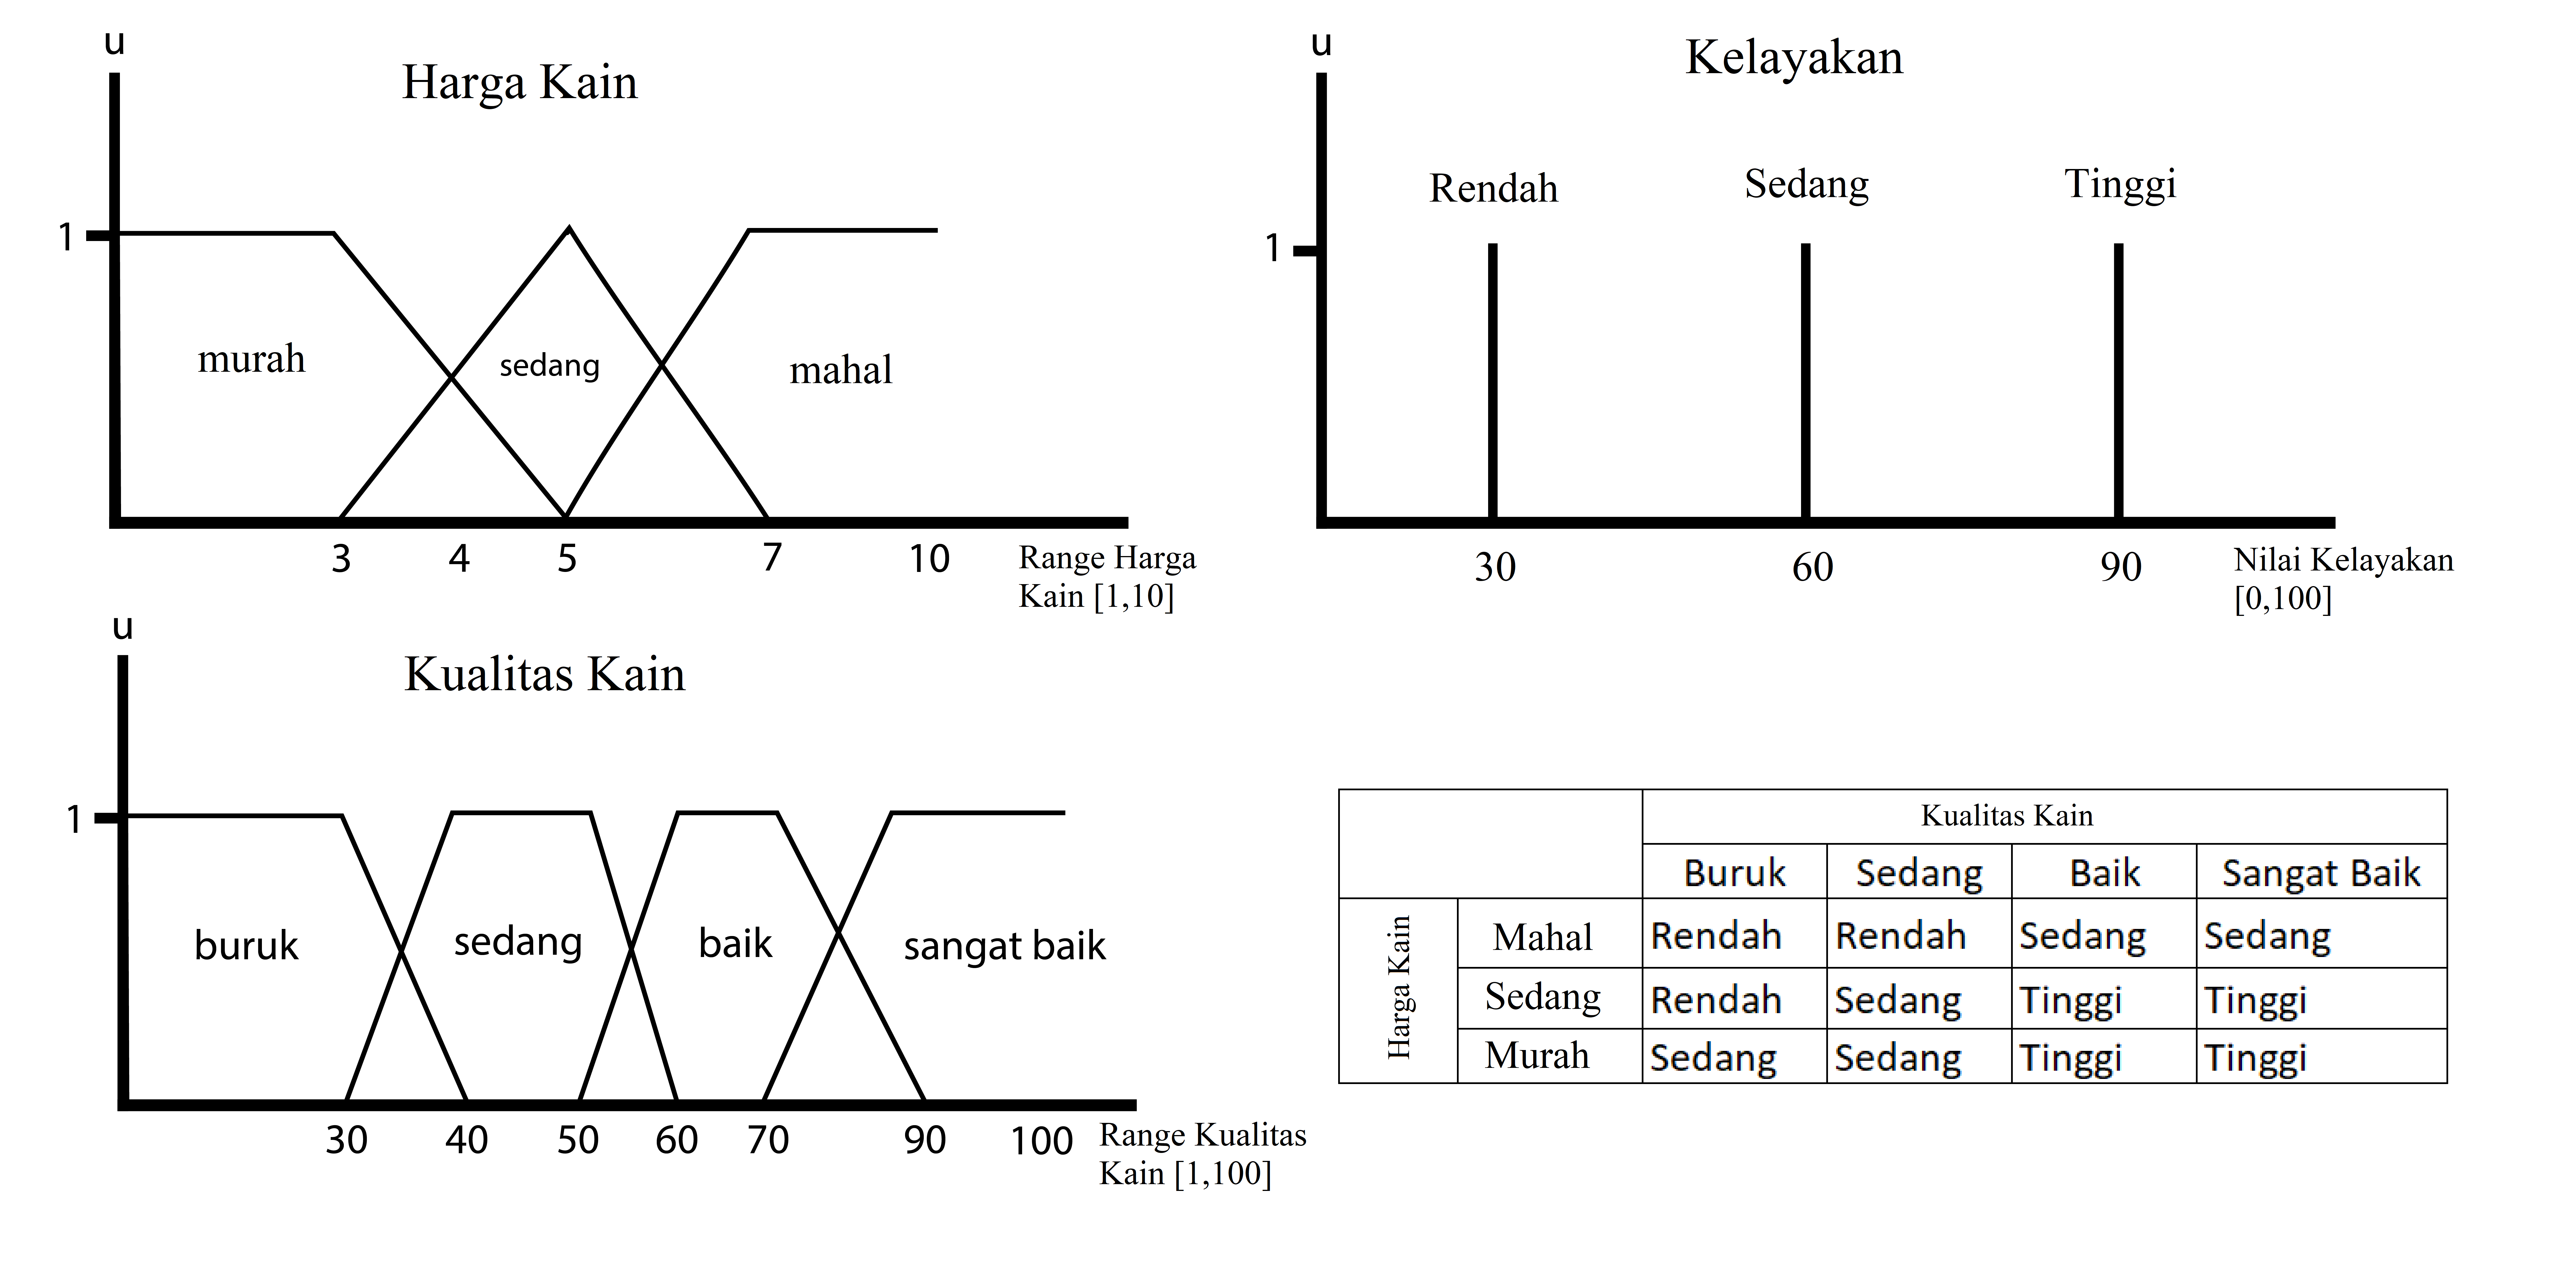

Import Library dan Pembacaan Files

In [6]:
import pandas as pd

In [7]:
data = pd.read_excel("supplier.xlsx")
data

,id,kualitas,harga
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


In [8]:
id = data["id"]
kualitas = data["kualitas"]
harga = data["harga"]

Pendefinisian Fungsi Keanggotaan

In [9]:
def segitiga(x, a, b, c):
    if x <= a:
        return 0
    elif a < x <= b:
        return (x-a)/(b-a)
    elif x == b:
        return 1
    elif b < x <= c:
        return (-(x-c))/(c-b)
    else:
        return 0

In [10]:
def trapesium(x, a, b, c, d):
  if x <= a:
    return 0
  elif a < x < b:
    return (x-a)/(b-a)
  elif b <= x <= c:
    return 1
  elif c < x <= d:
    return (-(x-d))/(d-c)
  else:
    return 0

Fuzzifikasi

In [11]:
kualitas_buruk = lambda x: trapesium(x, 0, 0, 30, 40)
kualitas_sedang = lambda x: trapesium(x, 30, 40, 50, 60)
kualitas_baik = lambda x: trapesium(x, 50, 60, 70, 90)
kualitas_sangatbaik = lambda x: trapesium(x, 70, 90, 100, 100)

In [12]:
harga_murah = lambda x: trapesium(x, 0, 0, 3, 5)
harga_sedang = lambda x: segitiga(x, 3, 5, 7)
harga_mahal = lambda x: trapesium(x, 5, 7, 10, 10)

In [13]:
def u_kualitas(x):
  kburuk = kualitas_buruk(x)
  ksedang = kualitas_sedang(x)
  kbaik = kualitas_baik(x)
  ksangatbaik = kualitas_sangatbaik(x)

  return kburuk, ksedang, kbaik, ksangatbaik

In [14]:
def u_harga(y):

  hmahal = harga_mahal(y)
  hsedang = harga_sedang(y)
  hmurah = harga_murah(y)

  return hmahal, hsedang, hmurah

Inferensi

In [15]:
# RULES SUGENO
def inference():
  tinggi = 0
  sedang = 0
  rendah = 0

  #1
  if kburuk != 0 and hmahal != 0:
    temp = min(kburuk, hmahal)
    rendah = max(rendah, temp)
  #2
  if kburuk != 0 and hsedang != 0:
    temp = min(kburuk, hsedang)
    rendah = max(rendah, temp)
  #3
  if kburuk != 0 and hmurah != 0:
    temp = min(kburuk, hmurah)
    sedang = max(sedang, temp)
  #4
  if ksedang != 0 and hmahal != 0:
    temp = min(ksedang, hmahal)
    rendah = max(rendah, temp)
  #5
  if ksedang != 0 and hsedang != 0:
    temp = min(ksedang, hsedang)
    sedang = max(sedang, temp)
  #6
  if ksedang != 0 and hmurah != 0:
    temp = min(ksedang, hmurah)
    sedang = max(sedang, temp)
  #7
  if kbaik != 0 and hmahal != 0:
    temp = min(kbaik, hmahal)
    sedang = max(sedang, temp)
  #8
  if kbaik != 0 and hsedang != 0:
    temp = min(kbaik, hsedang)
    tinggi = max(tinggi, temp)
  #9
  if kbaik != 0 and hmurah != 0:
    temp = min(kbaik, hmurah)
    tinggi = max(tinggi, temp)
  #10
  if ksangatbaik != 0 and hmahal != 0:
    temp = min(ksangatbaik, hmahal)
    sedang = max(sedang, temp)
  #11
  if ksangatbaik != 0 and hsedang != 0:
    temp = min(ksangatbaik, hmahal)
    tinggi = max(tinggi, temp)
  #12
  if ksangatbaik != 0 and hmurah != 0:
    temp = min(ksangatbaik, hmurah)
    tinggi = max(tinggi, temp)

  return tinggi, sedang, rendah

Defuzifikasi

In [16]:
def hasil(tinggi, sedang, rendah):
  value = ((tinggi * 90) + (sedang * 60) + (rendah * 30)) / ((tinggi + sedang + rendah))

  return value

Main Program

In [20]:
Peringkat = pd.DataFrame(columns = ["id", "kualitas", "harga", "Skor Kelayakan"])

for i in range(len(data["id"])):
  kburuk, ksedang, kbaik, ksangatbaik = u_kualitas(kualitas[i])
  hmahal, hsedang, hmurah = u_harga(harga[i])
  tinggi, sedang, rendah = inference()

  value = hasil(tinggi, sedang, rendah)
  id_restoran = id[i]
  id_kualitas = kualitas[i]
  id_harga = harga[i]
  Peringkat = Peringkat.append({'id': id_restoran, "kualitas" : id_kualitas, "harga" : id_harga,
                                'Skor Kelayakan': value}, ignore_index=True)
  
Peringkat = Peringkat.sort_values(by=["Skor Kelayakan","kualitas"], ascending = False)
# Excel = Peringkat.head(100)
# print(Excel)

Export Dataframe menjadi file peringkat.xls

In [21]:
Excel = Peringkat.head(5)

writer = pd.ExcelWriter('peringkat.xlsx')
Excel.to_excel(writer, index = False)
writer.save()

In [22]:
print("5 supplier terbaik pilihan Sistem Fuzzy :")
df = pd.read_excel("peringkat.xlsx")
df

5 supplier terbaik pilihan Sistem Fuzzy :


,id,kualitas,harga,Skor Kelayakan
0,3,98,2,90
1,91,98,3,90
2,52,94,3,90
3,34,93,4,90
4,92,83,3,90
